# Jacobian

Jacobian is matrix of partial derivations across variables

$$ \textbf{J}=
 \begin{bmatrix}
\frac{\partial f_n(k=0)}{\partial w_0} & \frac{\partial f_n(k=0)}{\partial w_1} & \cdots  & \frac{\partial f_n(k=0))}{\partial w_n} \\ 
\frac{\partial f_n(k=1)}{\partial w_0} & \frac{\partial f_n(k=1)}{\partial w_1} & \cdots  & \frac{\partial f_n(k=1))}{\partial w_n}\\ 
\vdots  & \vdots  &  \cdots & \vdots  \\ 
\frac{\partial f_n(k=N)}{\partial w_0} & \frac{\partial f_n(k=N)}{\partial w_1} & \cdots  & \frac{\partial f_n(k=N)}{\partial w_n}\\ 
\end{bmatrix}$$

## Integration - trapezoid

In [25]:
import numpy as np
dt = 0.1
t = np.arange(0, 10, dt)
x = np.sin(t)

for k in range(1, N):
    area += (x[k] + x[k-1]) * dt / 2


In [28]:
from numpy.fft import fft, fftfreq, ifft
import numpy as np

t = np.arange(0, 10, 0.1)
y = np.sin(t)

ffty = fft(y)

real_ffty = ffty.real
imag_ffty = ffty.imag

freqs = fftfreq(N, dt)  # Frequentions assigned to values - 0, 0.1, 0.2...


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9 -5.  -4.9 -4.8 -4.7 -4.6 -4.5
 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1
 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1]


## Gaussova plocha

$$ f(x,y)=\large \frac{1}{2\pi\sigma_x\sigma_y} e^\left(\large{-\frac{(x-\mu_x)^2}{(2\sigma_x^2))}-\frac{(y-\mu_y)^2}{(2\sigma_y^2))}}\right)\normalsize+noise, $$

## Cross correlation

$$r(x,y,lag)={1 \over {N}} \sum_{k}^N {(x_{k-lag}-\bar{x})(y_k-\bar{y})\over\sigma_x\sigma_y}$$

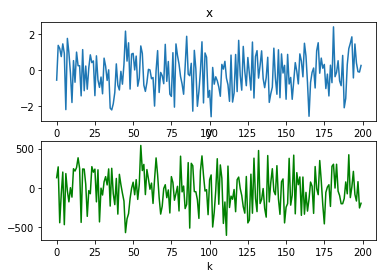

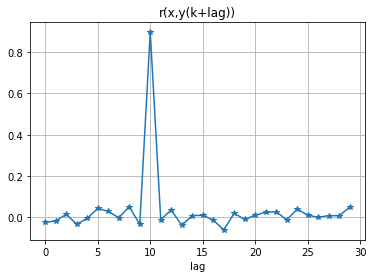

In [16]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
x = np.random.randn(N)
y = 10+200*x+100*np.random.randn(N)

Lag=10 # samples
x=x[Lag:] #this is now "measured" x
y=y[:N-Lag] 

plt.figure()
plt.subplot(211), plt.plot(x[0:200]), plt.title('x'), plt.xlabel('k')
plt.subplot(212), plt.plot(y[0:200],'g'), plt.title('y'), plt.xlabel('k')
plt.show()

lags = range(0, 30, 1)  # same as range(30)
i = 0
r = np.zeros(len(lags))
N = len(x)  # check actual length of data
for lag in lags:
    xx = x[:N-lag]  # preserving orig. values
    yy = y[lag:]
    r[i] = np.mean((xx-np.mean(xx))*(yy-np.mean(yy)))/np.std(xx)/np.std(yy)
    i += 1
plt.plot(lags, r, '*-'), plt.grid()
plt.title('r(x,y(k+lag))'), plt.xlabel('lag')
plt.show()

## Autocorrelation

$$r(y_{lag},y)={1 \over {N}} \sum_{k}^N {(y_{k+lag}-\bar{y}_{lag})(y_k-\bar{y})\over\sigma_{y_{lag}}\sigma_{y}}$$

We can use it for suppress influence of noise.

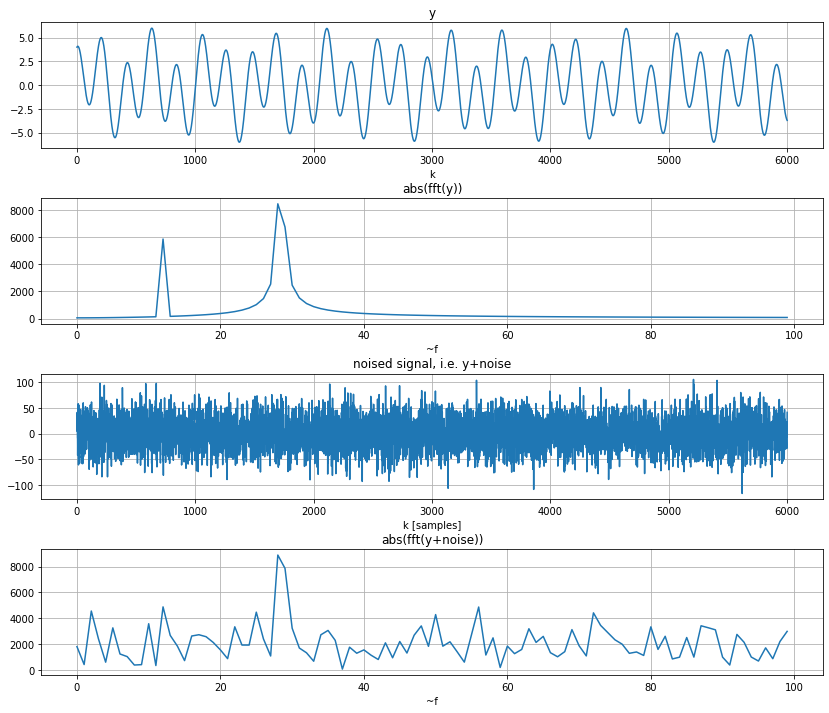

In [18]:
from numpy import arange, mean, std, pi, sin, cos
from numpy.fft import fft
from numpy.random import randn
from matplotlib.pyplot import *
%matplotlib inline
dt = 0.001  # sampling [sec]
dtal = 0.4  # slow sampling may lead to "Aliasing"
t = arange(0, 6, dt)
f = 2  # frequency [Hz]
omega1 = 2*pi*f
omega2 = 2*pi*f*2.37
A = 2
y = A*sin(omega1*t)+2*A*(cos(omega2*t))  # ideal data with noise
figure(figsize=(14, 12))
subplots_adjust(hspace=.4)
subplot(411), xlabel('k')
plot(y)
grid()
title("y")
subplot(412)
plot(abs(fft(y))[0:100]), xlabel('~f'), title('abs(fft(y))')
grid()
subplot(413)
y = y+30*randn(len(t))  # noised
plot(y), xlabel('k [samples]')
grid()
title("noised signal, i.e. y+noise")
subplot(414)
plot(abs(fft(y))[0:100]), xlabel('~f'), title('abs(fft(y+noise))')
grid()

show()

 ## Levenberg-Marquardt 
 
  $$\textbf{e}=\textbf{f}-\textbf{f}_n.$$
  
  $$\small\Delta \normalsize\textbf{w}^T=\left( \textbf{J}^T\cdot \textbf{J} +\large{ \frac{1}{\mu}}\cdot\textbf{L}\right)^{-1}\cdot \textbf{J}^{T}\cdot \textbf{e},\\
 \textbf{w}=\textbf{w}+\small\Delta \normalsize\textbf{w}, $$
 
 J is jacobian of the system and is described here [Jacobian](#Jacobian)